In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data_yelp = pd.read_csv('yelp.txt', sep='\t', header = None)

In [3]:
data_yelp.head()

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
columns_name = ['Review', 'Sentiment']
data_yelp.columns = columns_name

In [5]:
data_yelp.head()

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
data_yelp.shape

(1000, 2)

In [7]:
data_amazon = pd.read_csv('amazon.txt', sep='\t', header = None)

In [8]:
data_amazon.columns= columns_name

In [9]:
data_amazon.head()

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [10]:
data_amazon.shape

(1000, 2)

In [11]:
data_imdb = pd.read_csv('imdb.txt', sep='\t', header = None)

In [12]:
data_imdb.head()

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [13]:
data_imdb.columns

Int64Index([0, 1], dtype='int64')

In [14]:
data_imdb.columns= columns_name

In [15]:
data_imdb.head()

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [16]:
data_imdb.shape

(748, 2)

In [17]:
data = data_yelp.append([data_amazon,data_imdb], ignore_index=True)

In [18]:
data.shape

(2748, 2)

In [19]:
data.head()

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [20]:
data["Sentiment"].value_counts()

1    1386
0    1362
Name: Sentiment, dtype: int64

In [21]:
data.isnull().sum()

Review       0
Sentiment    0
dtype: int64

# Tokenization

In [22]:
import string
import spacy
from spacy import displacy

In [23]:
nlp = spacy.load('en_core_web_sm')

In [24]:
from spacy.lang.en.stop_words import STOP_WORDS

In [25]:
stopwords = list(STOP_WORDS)

In [26]:
punct = string.punctuation

In [27]:
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
def text_data_cleaning(sentence):
    doc = nlp(sentence)
    
    tokens = []
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)
    
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [29]:
text_data_cleaning("how are you all Guys. All is going well GOOgle Apple Indian")

['guy', 'google', 'apple', 'indian']

# Vectorization Feature Engineering (TF-IDF)

In [30]:
from sklearn.svm import LinearSVC

In [31]:
tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)
classifier = LinearSVC()

In [32]:
X = data['Review']
y = data['Sentiment']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
X_train.shape, X_test.shape

((2198,), (550,))

In [35]:
clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])

In [36]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7f9ec7d7cf28>)),
                ('clf', LinearSVC())])

In [37]:
y_pred = clf.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       285
           1       0.79      0.75      0.77       265

    accuracy                           0.78       550
   macro avg       0.78      0.78      0.78       550
weighted avg       0.78      0.78      0.78       550



In [47]:
cfm=confusion_matrix(y_test, y_pred)
cfm

array([[231,  54],
       [ 66, 199]])

In [40]:
clf.predict(['Wow, this is amzing lesson'])

array([1])

In [41]:
clf.predict(["amazing"])

array([1])

<AxesSubplot:>

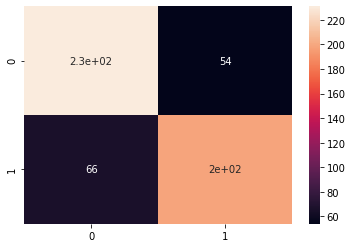

In [51]:
import seaborn as sns
import numpy as np
sns.heatmap(cfm, annot=True)

<AxesSubplot:>

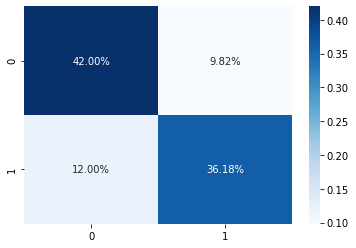

In [52]:
sns.heatmap(cfm/np.sum(cfm), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

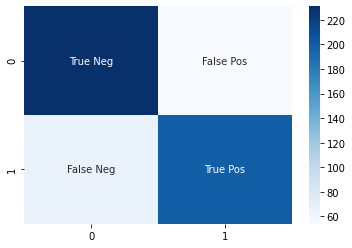

In [61]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm, annot=labels, fmt="", cmap='Blues')